<a href="https://colab.research.google.com/github/L-Lemos/rome_airbnb_prices/blob/main/Airbnb_Rome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Airbnb Data for the city of Rome

[Airbnb](https://www.airbnb.com/) has become one of the main lodging services worlwide, providing easy access to rooms and apartments almost anywhere across the globe, just a few clicks away.

Keeping such a massive online service certainly requires storing, processing and analyzing incredibly large sets of data, from both guests and accommodation owners. Some of this data [has been made available](http://insideairbnb.com/get-the-data.html) by Airbnb, presenting a great opportunity for data scientists looking for real-world data to use in their studies and projects.

<img alt="Logo" width="100%" src="https://raw.githubusercontent.com/L-Lemos/rome_airbnb_prices/c21650e527e8abc213fb03f1a90a1e670c3f8406/Rome%20Banner.png">

Among the cities whose Airbnb data is available, Rome has been selected for this study. The Italian capital is the second most visited city in the European Union, receiving almost 10 million tourists per year due to its many monuments, museums and stunning historical landmarks. It is, undoubtedly, a must-visit place for anyone interested in Ancient, Medieval and Renaissance history. 

As we'll see further ahead, there are many options for someone looking to visit Rome, from single rooms to luxurious penthouses, so some price analysis is a good idea for anyone wishing to find some accommodation so they can freely wander the city's historic center. 

**So, this notebook presents a brief analysis of Airbnb accomodation prices for Rome, in order to get some insights that can be useful not only from the data scientist's perspective, but also to the average tourist wishing to spend a week or two in the Eternal City.**

Keep in mind that there are also some local regulations on Airbnb hosts, complying them to provide guest personal information to public security authorities and to collect a tourist tax which of 3.50 euros per person per night, for a maximum of 10 consecutive nights. These requirements must be taken into account when planning any trip, but they shouldn't be any major nuisance to your stay in the city.

## Import necessary libraries

In [32]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd # Basic data manipulation
! pip install geopandas -q
import geopandas as gpd # Geographic data manipulation
import matplotlib.pyplot as plt # Plotting capabilities
import seaborn as sns # Additional plotting capabilities
import plotly.express as px # Plotly interactive plotting libraries
import plotly.graph_objects as go

%matplotlib inline

## Get Airbnb Data

By using the `pandas` library, it is possible to access the Airbnb open database for Rome, fetch the data from the provided .csv file, and store it in a `DataFrame` named `df`.

In [33]:
df = pd.read_csv('http://data.insideairbnb.com/italy/lazio/rome/2021-12-08/visualisations/listings.csv')

## Analyze Raw Data

Now that data has been stored in a `DataFrame`, it is time to start analyzing what kind of data is available. 

A [data dictionary]('https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896') is provided at the Inside Airbnb website, which describes the contents of each column in the data that has just been downloaded. 

It is now possible to build a dictionary of variables in the `DataFrame`.

**Dictionary of Variables**

* **id** - Unique Airbnb id for the listed accommodation
* **name** - Name of the accommodation, as shown in Airbnb webpage
* **host_id** - The accommodation owner id number
* **host_name** - Accommodation owner name
* **neighbourhood_group** - From Inside Airbnb website: "The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles".
* **neighbourhood** - Neighbourhood name
* **latitude** - Latitude of the listed accommodation
* **longitude** - Longitude of the listed accommodation
* **room_type** - Type of the accommodation (single/share room, entire home/apartment, etc.)
* **price** - Accommodation price, in euros per night
* **minimum_nights** - Minimum amount of nights that a guest must stay at the accommodation 
* **number_of_reviews** - Total number of reviews written by guests that stayed in this accommodation
* **last_review** - The date of the last review written to the accommodation
* **reviews_per_month** - Average number of reviews an accommodation has received every month, along the time it has been listed in Airbnb
* **calculated_host_listings_count** - The number of accommodations owned by the same host in the city
* **availability_365** - How many days per year is this accommodation available for guests
* **number_of_reviews_ltm** - Number of reviews this accommodation has received in the last twelve months
* **license** - License/permit registration code of this accommodation with local authorities 

Before starting any analysis of the data, let's take a look at our `DataFrame`.

In [34]:
# Show first five entries of dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87136,12.48215,Private room,28,7,7,2015-05-28,0.08,5,363,0,NaN
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88824,12.46953,Private room,66,1,55,2017-10-31,0.35,3,243,0,NaN
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89500,12.49117,Entire home/apt,90,5,19,2021-09-11,0.14,7,350,2,NaN
3,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92582,12.46928,Entire home/apt,63,1,43,2021-08-25,0.32,2,209,3,NaN
4,16276,B&B Calisto6 great location in Rome,3280,Andrea,NaN,I Centro Storico,41.89007,12.47122,Private room,66,1,6,2015-06-18,0.04,3,358,0,NaN


It can readily seen that there are missing values in the **neighbourhood_group** and **license** columns (registered as NaN). This will be discussed in more detail further ahead. 

For now, it is time to start asking some basic questions regarding our dataset. The first one:

### Q1. How many variables and entries does our dataset contain? What is the type of each of the variables? 

In [35]:
# Print how many entries (rows) and variables (columns) are in the dataset
print(f'There are {df.shape[0]} entries (rows) and {df.shape[1]} variables (columns) in the raw dataset')

There are 24627 entries (rows) and 18 variables (columns) in the raw dataset


In [36]:
# Print the type of each variable in the dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Most variable types seem to be OK, with the text variables **name**,**host_name**,**neighbourhood** and **room_type** stored as objects (this is default `pandas` library behavior), and numeric variables stored either as integers or as floats. 

However, the **last_review** variable, which should be a datetime, is also stored as an object. This can be corrected with the following lines of code:

In [37]:
df.last_review = df.last_review.astype('datetime64')
df.dtypes.last_review.name

'datetime64[ns]'

The next important thing to check in our dataset is the amount of data that is missing from it.

### Q2. What's the percentage of missing data in the dataset?

In [38]:
# Calculate the percentage of missing values in the dataset and print them
100 * df.isnull().sum() / df.shape[0]

id                                  0.000000
name                                0.028424
host_id                             0.000000
host_name                           0.069030
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        20.319162
reviews_per_month                  20.319162
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                            87.546189
dtype: float64

We can readily see there are no actual entries for **neighbourhood_group** in the dataset, so this variable can be ignored in our analysis. 

There are also many missing values for **last_review** and **reviews_per_month** (around 20% of them), possibly due to accommodations which never received a review from guests. 

As for **license**, with 87% missing values, this may indicate that, by the time this data was made available, registration with city authorities were not yet mandatory, but would soon be required. Some further investigation is needed to check this hypothesis.

But then again, the missing values regardind licenses and guest reviews are of not much concern right now, since our analysis focuses on accommodation prices. Before making any conclusions, let's look at how is the data distributed.

### Q3. What is the distribution of dataset variables?

A quick way to check this is by plotting some histograms with `pandas`. This, however, can only be done for numeric variables such as price, latitude, longitude, etc.

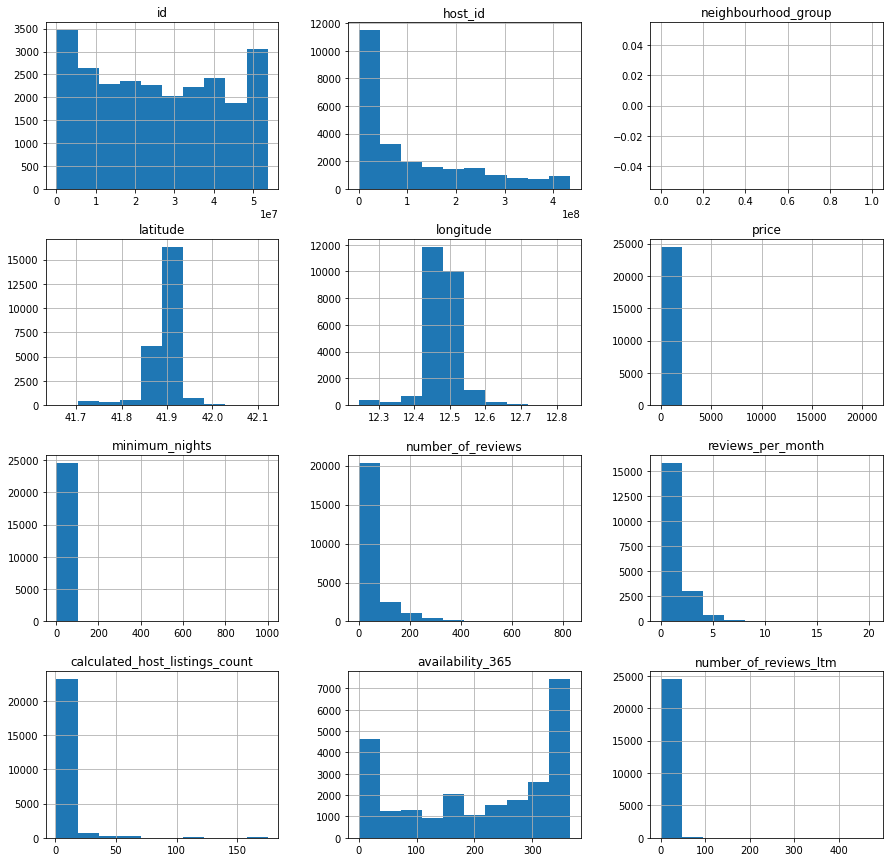

In [39]:
# Get the numeric variables from the dataset
numeric_cols = [pd.api.types.is_numeric_dtype(dd) for dd in df.dtypes]

# Plot histograms only for numeric variables
df.loc[:,numeric_cols].hist(figsize=(15,15));

Some of these histograms show some strange behavior, which indicate that there are some outliers present in **price** and **minimum_nights** data. It makes no sense that a room of apartment would cost 20000 euros a night or that it would demand that the guest would stay for at least 1000 nights there...

The **neighbourhood_group** histogram, as expected, is empty, since there is no data for this variable.

The analysis can be further improved by having a look on the quantiles, mean, maximum and minimum values of each variable.

In [40]:
df.loc[:,numeric_cols].describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.462700e+04,2.462700e+04,0.0,24627.000000,24627.000000,24627.000000,24627.000000,24627.000000,19623.000000,24627.000000,24627.000000,24627.000000
mean,2.582518e+07,1.066301e+08,NaN,41.892212,12.480681,128.449710,3.598083,42.934219,1.159860,6.755959,209.542494,4.928087
std,1.651706e+07,1.190286e+08,NaN,0.034910,0.046705,483.375953,18.081441,72.794826,1.276123,17.892365,133.901768,10.075226
min,2.737000e+03,1.944000e+03,NaN,41.656720,12.243680,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.089349e+07,1.369684e+07,NaN,41.886520,12.462020,52.000000,1.000000,1.000000,0.200000,1.000000,81.000000,0.000000
50%,2.484051e+07,4.954386e+07,NaN,41.896750,12.478170,75.000000,2.000000,10.000000,0.730000,2.000000,249.000000,0.000000
75%,4.045871e+07,1.807954e+08,NaN,41.906370,12.503650,110.000000,3.000000,52.000000,1.700000,5.000000,338.000000,5.000000
max,5.373328e+07,4.346146e+08,NaN,42.121740,12.837740,21000.000000,1000.000000,829.000000,20.320000,175.000000,365.000000,476.000000


These numbers spark a curiosity: who is this host that has 175 registered accomodations, as we can see from the description of **calculated_host_listings_count** data?

In [41]:
# Get the name of the host with the maximum amount of listed accommodations
max_listings_host = df.host_name.loc[df.calculated_host_listings_count.idxmax()]

print(f'Host with most listed accommodations is {max_listings_host}.')

Host with most listed accommodations is IFlat.


So it seems that there is a company specialized in providing accommodations in Rome. Interesting business.

Now, before asking any new questions on the dataset, it is necessary to clean it first.

### Data cleaning

Let us remove the **neighbourhood_group** and **license** columns, since there is little or no data at all for these variables, and they are not of interest to us now.

To do that, let us create a new `DataFrame` named `df_clean`, which is initially a copy of `df`, but without the **neighbourhood_group** and **license** data.

In [42]:
# Create a new dataset named df_clean, 
df_clean = df.drop(['neighbourhood_group','license'], axis=1).copy()

The histograms and distribution descriptors we just obtained have indicated that there are some outliers on the **price** and **minimum_nights** variables. Fortunately, there are no missing values for any of these variables, so the cleaning will consist mainly of outlier removal.

First, let's clean price data.

#### Cleaning price data

A boxplot description of **price** data can help to visually identify outliers.

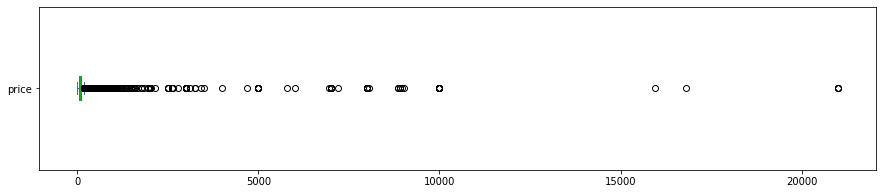

In [43]:
df_clean.price.plot(kind='box',vert=False, figsize=(15,3));

The plotted black dots show points that `pandas` has identified as outliers, using the Inter-Quartile Range (IQR) criteria. Just for reference, let us calculate IQR limits.

In [44]:
# Calculate first and third quartiles
q1 = df_clean.price.quantile(.25)
q3 = df_clean.price.quantile(.75)

# Calculate inter-quartile range (IQR)
iqr = q3 - q1

# Calculate upper and lower outlier thresholds
outlier_upper = q3 + 1.5 * iqr
outlier_lower = q1 - 1.5 * iqr

# Print results
print(f'Using the IQR method, the lower and upper limits \nfor price outlier removal are {outlier_lower:.2f} and {outlier_upper:.2f}')

is_outlier = (df_clean.price >= outlier_upper) | (df_clean.price <= outlier_lower)
print(f'Using these limits, {100*is_outlier.sum()/df_clean.shape[0] :.2f}% of price records are outliers')

Using the IQR method, the lower and upper limits 
for price outlier removal are -35.00 and 197.00
Using these limits, 8.88% of price records are outliers


The IQR method indicates that there are no lower outliers, i.e., prices so low that they make no sense. Furthermore, all the outliers identified in the boxplot are above the IQR upper limit.

Of course, it is necessary to check for any zeros in **price** data, and remove them.

In [45]:
# Remove entries with price equal to zero
df_clean.drop(df_clean.loc[df_clean.price.eq(0)].index, axis=0, inplace=True)

Regarding the upper limit for outlier removal, it is still too soon to state that any accommodation with a price higher than 197 euros/night can be treated as spurious data. As we have seen, almost 9% of the listed accommodations cost more than 197 euros per night, which is not really a negligible fraction of the entries. 

Besides, it makes sense that [drinking some wine in a Jacuzzi on a penthouse while looking at the *Altare della Patria*](https://www.airbnb.com/rooms/41924859?adults=1&children=0&infants=0&location=Rome%2C%20Italy&check_in=2022-07-29&check_out=2022-07-31&federated_search_id=185f3e36-c139-477b-982a-4a01a08b4c50&source_impression_id=p3_1643926914_nvKGpEly5ZdJSFyO) will cost you extra...

In this case, some further considerations are necessary to choose an outlier removal limit. As stated at the beginning of this notebook, the price analysis here is aimed for "the average tourist wishing to spend a week or two" in Rome. So, let us consider that this average tourist does not wish to rent a luxury penthouse, and consider that, for the purposes of this analysis, any accommodation costing more than, let's say, 250 euros/night is to be disregarded. Again, this does not mean that there are no actual apartments in Rome that would cost more than that, this 250 euros limit has been chosen to keep our analysis simple.

In [46]:
# Remove entries with price larger than to 250 euros/night
df_clean.drop(df_clean.loc[df_clean.price > 250].index, axis=0, inplace=True)

Now it is time to take a look at **minimum_nights** outliers.

#### Cleaning minimum_nights data

A box plot of **minimum_nights** can help check for outliers, using the IQR method.

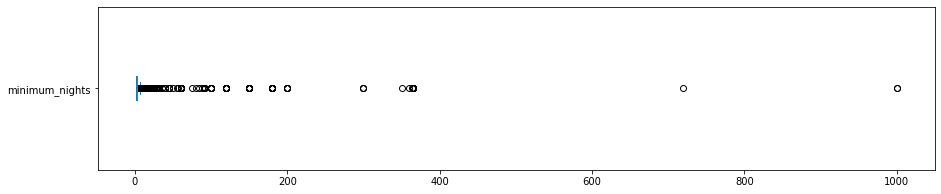

In [47]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));

Once again, since we expect the results of this analysis to be useful for casual tourists, let's see how many of the entries in the dataset demand a minimum stay of more than 7 nights.

In [48]:
min_nights_outliers = df_clean.minimum_nights > 7

print(f'{min_nights_outliers.sum()} entries of {df_clean.shape[0]} are outliers.')
print(f'That is {100*min_nights_outliers.sum()/df_clean.shape[0]:.2f} % of the total entries.')

748 entries of 23283 are outliers.
That is 3.21 % of the total entries.


Let's proceed and remove these entries from the dataset.

In [49]:
df_clean.drop(df_clean[min_nights_outliers].index, axis=0, inplace=True)

Now to check how the dataset looks after outlier removal from **price** and **minimum_nights**.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.253500e+04,2.253500e+04,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,18300.000000,22535.000000,22535.000000,22535.000000
mean,2.580492e+07,1.071259e+08,41.891876,12.480626,83.846949,2.004926,44.803417,1.195935,6.489239,209.710761,5.271356
std,1.656875e+07,1.191476e+08,0.035086,0.047115,44.952134,1.187761,74.469690,1.297156,16.713762,133.692285,10.390959
min,2.737000e+03,1.944000e+03,41.656720,12.243680,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.081837e+07,1.376634e+07,41.886390,12.461630,51.000000,1.000000,1.000000,0.220000,1.000000,81.000000,0.000000
50%,2.485280e+07,5.034823e+07,41.896640,12.478020,73.000000,2.000000,11.000000,0.760000,2.000000,249.000000,1.000000
75%,4.046045e+07,1.818158e+08,41.906170,12.503895,100.000000,3.000000,55.000000,1.760000,5.000000,338.000000,6.000000
max,5.373257e+07,4.346146e+08,42.121600,12.837740,250.000000,7.000000,829.000000,20.320000,175.000000,365.000000,476.000000


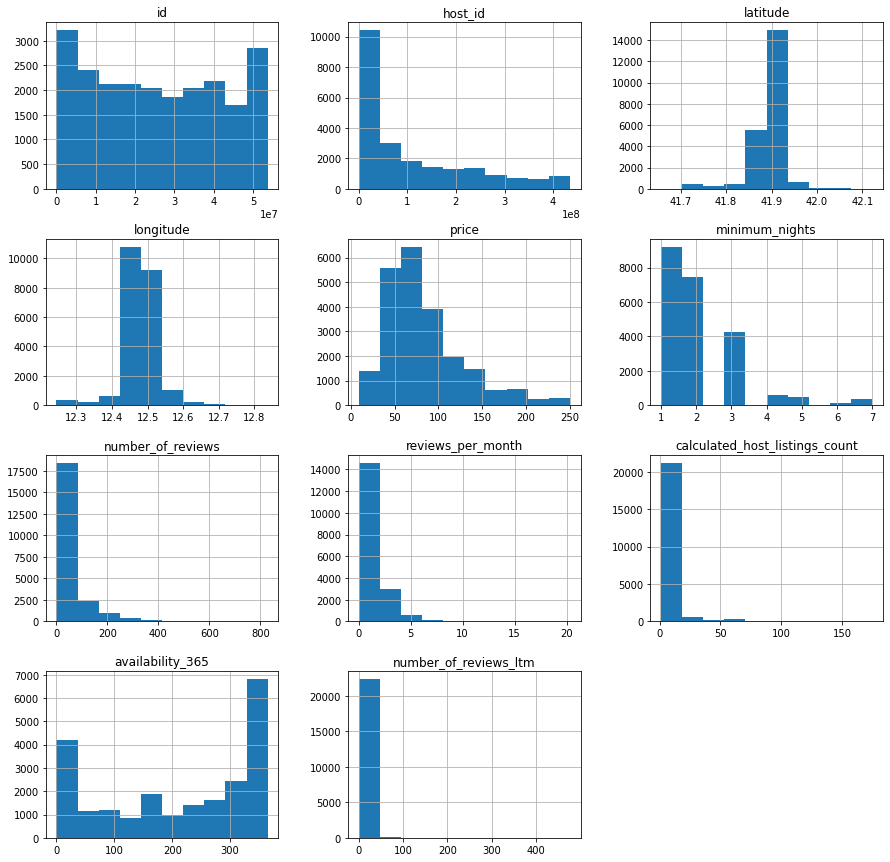

In [50]:
numeric_cols = [pd.api.types.is_numeric_dtype(dd) for dd in df_clean.dtypes]
df_clean.loc[:,numeric_cols].hist(figsize=(15,15));
df_clean.describe()

Everything seems in order with **price** and **minimum_nights** data, now it is time to answer some more questions.

### Q4. What's the average price for an accommodation in Rome? On average, what is the minimum stay time?

In [51]:
# Calculate and print price and minimum_nights means

price_mean = df_clean.price.mean()
print(f'The average price in Rome is {price_mean:.2f} euros per night.')

min_stay_mean = df_clean.minimum_nights.mean()
print(f'On average, guests must stay at least for {round(min_stay_mean)} nights.')

The average price in Rome is 83.85 euros per night.
On average, guests must stay at least for 2 nights.


### Q5. Is there any correlation between dataset variables?

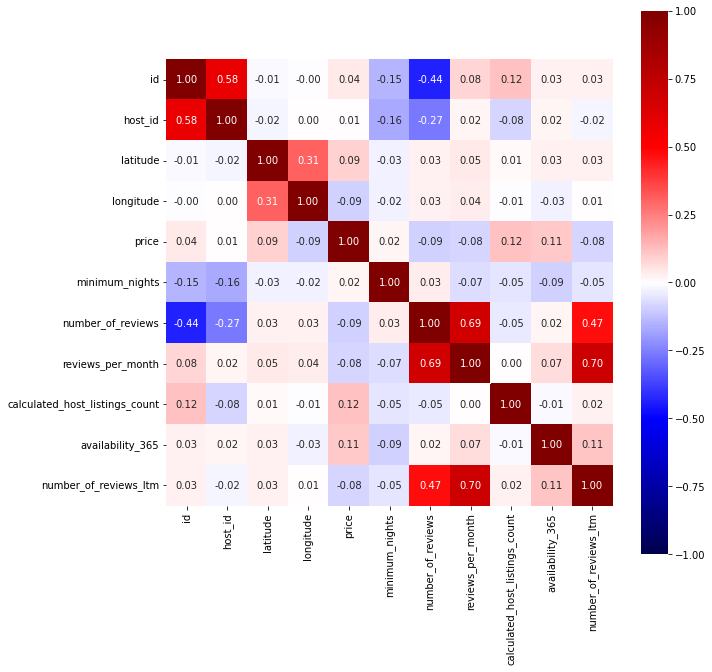

In [52]:
# Create a correlation matrix for numeric variables, then show it
corr = df_clean.loc[:,numeric_cols].corr()
corr
# Plot a heatmap of correlations using Seaborn
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='seismic', vmin=-1, vmax=1, fmt='.2f', square=True, linecolor='white', annot=True);

Variables related to the number of reviews are strongly correlated, which is no surprise, given that accommodations with more reviews per month will have more reviews in total. Strong correlations are also seen between **id** and **host_id**, probably due to the way in which Airbnb registers hosts and accommodations. So, in general, there is no clear, meaningful correlation between variables that should catch our attention.

### Q6. What is the most common type of accommodation in Rome?

In [53]:
# Show count of room_types
df_clean.room_type.value_counts(ascending=False)

Entire home/apt    14376
Private room        7159
Hotel room           879
Shared room          121
Name: room_type, dtype: int64

In [54]:
# Show fraction of room types
room_type_fracs = df_clean.room_type.value_counts(ascending=False)/df_clean.shape[0]
print(room_type_fracs)
print(f'\nMost common type of accommodation in Rome is {room_type_fracs.index[0]}, which are {100*room_type_fracs[0]:.2f}% of all accommodations.')

Entire home/apt    0.637941
Private room       0.317684
Hotel room         0.039006
Shared room        0.005369
Name: room_type, dtype: float64

Most common type of accommodation in Rome is Entire home/apt, which are 63.79% of all accommodations.


### Q7. In what neighbourhood are rents, on average, most expensive?

Rome is divided into 15 districts, also called Municipios, which are the administrative subdivisions of the city. It is important to know how Airbnb prices differ from one Municipio to another. Such analysis can be carried out by grouping prices in the dataset according to the district in which they are located.

In [55]:
# Group prices by neighbourhood and print results
grouped_price = df_clean.groupby(by='neighbourhood')
mean_price_df = grouped_price.price.mean().sort_values(ascending=False)
mean_price_df

neighbourhood
I Centro Storico              95.871196
XIII Aurelia                  77.692364
XV Cassia/Flaminia            77.364611
II Parioli/Nomentano          76.466454
IX Eur                        74.148515
X Ostia/Acilia                73.532895
XII Monte Verde               72.614232
XIV Monte Mario               70.799127
VII San Giovanni/Cinecittà    66.691018
VIII Appia Antica             65.736264
XI Arvalia/Portuense          63.142494
III Monte Sacro               63.082386
IV Tiburtina                  58.855330
VI Roma delle Torri           55.994624
V Prenestino/Centocelle       51.975666
Name: price, dtype: float64

In [56]:
# Also check how many accommodations are listed in each neighbourhood
print(grouped_price.price.count().sort_values(ascending=False))

# Fraction of Airbnb listings located in city center
print(f'\n{100*grouped_price.price.count().max()/df_clean.shape[0]:.2f} % of Airbnb listings are located in Rome Historic Center')

neighbourhood
I Centro Storico              12290
VII San Giovanni/Cinecittà     1670
II Parioli/Nomentano           1565
XIII Aurelia                   1375
XII Monte Verde                1068
V Prenestino/Centocelle         863
VIII Appia Antica               637
X Ostia/Acilia                  608
XIV Monte Mario                 458
IV Tiburtina                    394
XI Arvalia/Portuense            393
XV Cassia/Flaminia              373
III Monte Sacro                 352
IX Eur                          303
VI Roma delle Torri             186
Name: price, dtype: int64

54.54 % of Airbnb listings are located in Rome Historic Center


The average prices are higher on Rome's historic center, which is understandable: that's where most landmarks and monuments are located. That is also the region of the city with most available rooms and apartments - little more than half of Rome's Airbnb listings. So, in comparison with Rome's Historic Center, accommodations in other parts of the city are scarce, especially in Roma delle Torri.

Because of this, it is important to see how prices are distributed in the Historic Center alone. Let's plot a histogram of Airbnb prices in Rome's center.

In [57]:
# Interactive histograam of Rome's Historic Center prices
px.histogram(df_clean.loc[df_clean.neighbourhood.eq('I Centro Storico')].price, nbins=15)

We can see that there are in fact many accommodations in the historic with prices between 20 and 79 euros per night - more than 5000 Airbnb listings, that's more than in any other part of the city. 

This means that, even though Historic Center average prices are higher, this part of the city is still the best disctrict to find accommodations at good prices.

An even better way to see this average price distribution across districts is via mapping Rome's districts. This can be done using `geopandas` and `plotly` libraries. 

Also, some geographic information on Rome is going to be useful. The Inside Airbnb webpage provides shapefiles containing the boundaries of Rome Municipios. It is also interesting to have a look at Rome's subway network, since it is one the main means of transportation if one is staying on neighbourhoods far from the city center. Furthermore, some boundary information on the Vatican is also important, since it is among the main reasons for people travelling to Rome. 

Subway network information and Vatican boundaries can be obtained using OpenStreetMap library (`OSMPythonTools`).

In [58]:
# Acquire Roman district shapefiles from InsideAirbnb webpage
rome_areas = gpd.read_file('http://data.insideairbnb.com/italy/lazio/rome/2021-12-08/visualisations/neighbourhoods.geojson')

rome_areas = rome_areas.merge(mean_price_df,on='neighbourhood')
rome_areas.set_index('neighbourhood', inplace=True)

In [59]:
# Import OpenStreetMap tools
!pip install OSMPythonTools -q
from OSMPythonTools.overpass import overpassQueryBuilder
from OSMPythonTools.nominatim import Nominatim
from OSMPythonTools.overpass import Overpass

# Get Rome's subway network
nominatim = Nominatim() # Get API identifiers for Rome using Nominatim
Rome = nominatim.query('Rome')

# Build a query for Rome's subway system, enter Rome identifier generated by Nominatim, 
# plus additional query parameters
query = overpassQueryBuilder(area=Rome, elementType='way', selector='"railway"="subway"', 
                             out='body', includeGeometry=True)

# Call Overpass API and query for the subway system data
overpass = Overpass()
subwaylines = overpass.query(query)

In [60]:
# Get Vatican city identifier
Vatican = nominatim.query('Vatican')

# Build query for Vatican borders, using Nominatim identifier and additional query parameters
query = overpassQueryBuilder(area=Vatican, elementType='relation', 
                             selector='"boundary"="administrative"',out='body', includeGeometry=True)

# Query for Vatican borders on Overpass API
vatican_borders = overpass.query(query)

# Get shape from query result
vatshape = vatican_borders.elements()[0].geometry()

# Assign to a geodataframe, then merge with other Rome areas dataframe 
vatdict = {'neighbourhood_group': None, 'geometry': [vatshape], 'price': 10000000}
vatarea = gpd.GeoDataFrame(vatdict)
vatarea.index=['Vatican']
rome_areas = rome_areas.append(vatarea)

In [61]:
# Plot map of Rome's districts, colored according to the average price in each one
fig = px.choropleth_mapbox(rome_areas,
                           geojson=rome_areas.geometry,
                           locations=rome_areas.index                            ,
                           color='price', 
                           mapbox_style="open-street-map",
                           title = 'Average price for Airbnb in Roman districts, in euros per night (hover cursor om map to see values)',
                           center={"lat": 41.9, "lon": 12.5},
                           color_continuous_scale=px.colors.sequential.Jet,
                           range_color=(50, 100), zoom=8.5)

# Plot subway lines
sub_lines = list()
for (line_idx,i) in enumerate(subwaylines.elements()):    
    sub_lats = list()
    sub_lons = list()
    for sw_coords in i.geometry()['coordinates']:
        sub_lons.append(sw_coords[0])
        sub_lats.append(sw_coords[1])        
        
    sub_lines.append([sub_lats, sub_lons])
    
    fig.add_trace(go.Scattermapbox(
            mode = "lines",
            lon = sub_lines[line_idx][1],
            lat = sub_lines[line_idx][0],
            line = dict(width = 1.5,color = 'red'),
            showlegend=False, hoverinfo='skip'))    

# Show interactive plot    
fig.show()

This map shows Rome's districts and subway lines connecting them to the city center at Roma Termini, the city main train and subway center, right at the Historic Center. The Vatican can be seen as a small dark patch on the western part of the city center.

What can be concluded from this map is that, in case you are not able to find an Airbnb room or apartment in the Historic Center (in summer, for instance, when the city is packed with tourists), and if you don't mind spending some time on the subway, perhaps you can get cheaper rooms or apartments in some parts of Parioli/Nomentano or Aurelia (this last one especially if you'd like to stay near the Vatican). 

If you are running on a tight budget and don't mind even longer subway rides, perhaps Prenestino/Centocelli or San Giovanni/Cinecittá. In other parts of the city, sch as Tiburtina and Roma delle Torri, there are not so many options for rent, and it is indeed a very long subway journey from there to city center.

Prices in Ostia are not so low, probably because people staying in these parts of Rome look for short trips to the beach. Lakes and natural reservations also explain the relatively high prices in northern parts of the city (as we'll see in more detail on the next map).

Of course, no matter where in Rome you plan to get an Airbnb room, it's always necessary to check on the vicinities first. A good price is not necessarily a nice stay.

In any case, it is a good idea to have a more detailed look at Rome's Airbnb listings. If you already have a particular place in mind (staying near Piazza Navona or the Pantheon, for instance), then it is best to have a map showing actual prices along Rome: district average prices can be misleading, as it is possible to find good prices even in the Historic Center.

So, to our next question.

### Q8. How are these accommodations distributed across the city?

In [62]:
# Turn cleaned dataframe into geodataframe
gdf_rome = gpd.GeoDataFrame(df_clean,geometry=gpd.points_from_xy(df_clean.longitude, df_clean.latitude))

# Plot interactive map
fig = px.scatter_mapbox(gdf_rome, lat=gdf_rome.latitude, lon=gdf_rome.longitude,
                        color='price',  
                        hover_name='name',
                        mapbox_style="open-street-map",
                        title = 'Prices for Airbnb in Rome, in euros per night (zoom and hover cursor on map to see values)',
                        center={"lat": 41.9, "lon": 12.5},
                        color_continuous_scale=px.colors.sequential.Jet,
                        zoom=8.5)
fig.data[0]['marker']['size'] = 10
fig.show()

Now it is possible to explore the city map and check for good prices anywhere in the city. This map shows, for instance, that are indeed some good prices for rooms in Rome's center, even though average prices are higher in this part of the city.

Besides, some interesting locations show up, like some expensive apartments far to the north of the city, near Lake Martignano, or near other natural reservations around Rome, far from the city center. Or you can zoom in and have a look at the mix of luxurious apartments and affordable rooms near the Colosseum and the Pantheon. 

## Conclusions

The raw Airbnb data used in this study still required some processing, such as discarding variables with no entries and removing some outliers still present in the dataset. It must be emphasized that this open data was subjected to cleaning procedures before being made available, which is why the the very simple data cleaning procedures employed here were effective in removing spurious data from the dataset.

The analysis carried out here was focused mainly on accommodation prices for the average visitor to Rome, so that luxury apartments and places requiring week or month long stayings were not considered for the study. 

By analyzing both Airbnb data and geographical information for the city of Rome, it was possible to compare room prices among Rome's districts and across the city. On average, central Rome has the more expensive rooms and apartments, with prices getting lower as distance from the Historic Center increase. There are exceptions to this trend, since costs to the south in Ostia and to the north in Cassia/Flaminia are relatively high, due to presence of beaches, lakes and natural parks. A street map of Rome was also plotted, which enables to see room prices in the vicinity of any desired location in the city - this allows for a more detailed search, in order to find good prices even in more expensive parts of the city.

Further, more detailed studies can be carried out, which take into account other accommodation characteristics such as number of rooms, whether they are located on street level or a penthouse, among other features which are also available as a different, more detailed dataset at InsideAirbnb webpage.